In [1]:
from sedcreator import SedFluxer, SedFitter, ModelPlotter
from astropy.io import fits as pyfits
from astropy.coordinates import SkyCoord
import matplotlib.pylab as plt
import numpy as np
%matplotlib ipympl

Details of the methods can be found in https://pypi.org/project/sedcreator/, as well as in Sect.3.3 of the thesis related to this folder.
This is the SED fitting for the main source, G45.47-IRS1, for the other sources it would be analogous

In [2]:
# Open a fits file with valid data and header
G4547_SO37_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_SOFIA_37.fits')
G4547_SO37_fits

In [3]:
G4547_SO37_fluxer = SedFluxer(G4547_SO37_fits[0])

In [4]:
#Define the central coordinates and aperture radius to perform the aperture photometry
G4547_coords = SkyCoord(ra='19h14m25.67s', dec='+11d09m25.45s', frame='fk5')

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating

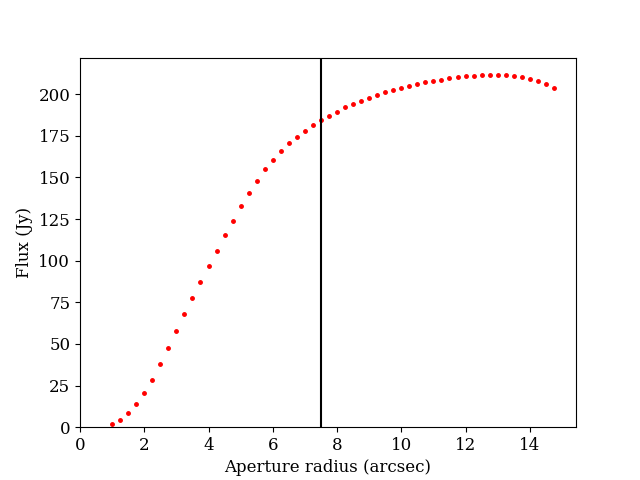

The optimal aperture is  7.5  arcsec


In [5]:
# This has been made with an input aperture, but actually the optimal aperture can be computed

G4547_opt_aper = G4547_SO37_fluxer.get_optimal_aperture(central_coords=G4547_coords,
                                                             ap_inner=1.0,ap_outer=15.0,step_size=0.25,
                                                             aper_increase=1.3,threshold=1.1,profile_plot=True)

print('The optimal aperture is ',G4547_opt_aper,' arcsec')

a floating-point value was expected. [astropy.wcs.wcs]


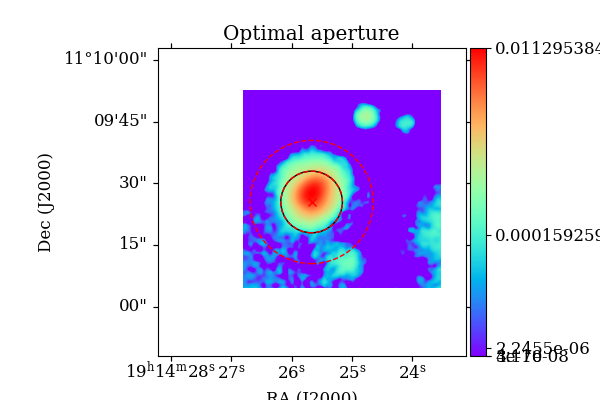

In [6]:
G4547_SO37_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None).plot(cmap='rainbow',title='Optimal aperture')

# SED fitting

### Spitzer

The aperture used is 7.5 arcsec
pixel scale is 0.6 arcsec/pixel
~ 12.5 pixels are used for the aperture radius
units in the image are: MJy/sr
Observing date: 2004-10-06 04:20:56.458
Wavelength: 8.0
############################
Flux bkg sub 0.1216779014752247 Jy
Flux         0.40287081441624867 Jy
Fluc error   0.06220212205599293 Jy
Background   0.281192912941024 Jy
############################


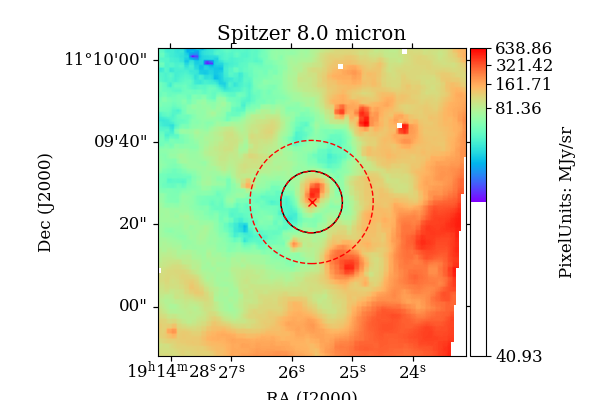

In [7]:
#Spitzer 3.6 micron
G4547_S36_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Spitzer_36.fits')

#note that for Spitzer the data is in the first extension
G4547_S36_fluxer = SedFluxer(G4547_S36_fits[0])

G4547_S36_gt = G4547_S36_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_S36_flux_bkg,G4547_S36_flux,G4547_S36_flu,G4547_S36_bkg=G4547_S36_gt.value #Jy
G4547_S36_syst_err = 0.1*G4547_S36_flux_bkg
G4547_S36_flu_error = np.sqrt(np.array(G4547_S36_flu)**2+np.array(G4547_S36_syst_err)**2)
G4547_S36_bkg_error = np.sqrt(np.array(G4547_S36_bkg)**2+np.array(G4547_S36_syst_err)**2)
G4547_S36_lambda = 3.6 #micron

#Spitzer 4.5 micron
G4547_S45_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Spitzer_45.fits')

#note that for Spitzer the data is in the first extension
G4547_S45_fluxer = SedFluxer(G4547_S45_fits[0])

G4547_S45_gt = G4547_S45_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_S45_flux_bkg,G4547_S45_flux,G4547_S45_flu,G4547_S45_bkg=G4547_S45_gt.value #Jy
G4547_S45_syst_err = 0.1*G4547_S45_flux_bkg
G4547_S45_flu_error = np.sqrt(np.array(G4547_S45_flu)**2+np.array(G4547_S45_syst_err)**2)
G4547_S45_bkg_error = np.sqrt(np.array(G4547_S45_bkg)**2+np.array(G4547_S45_syst_err)**2)
G4547_S45_lambda = 4.5 #micron

#Spitzer 5.8 micron
G4547_S58_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Spitzer_58.fits')

#note that for Spitzer the data is in the first extension
G4547_S58_fluxer = SedFluxer(G4547_S58_fits[0])

G4547_S58_gt = G4547_S58_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_S58_flux_bkg,G4547_S58_flux,G4547_S58_flu,G4547_S58_bkg=G4547_S58_gt.value #Jy
G4547_S58_syst_err = 0.1*G4547_S58_flux_bkg
G4547_S58_flu_error = np.sqrt(np.array(G4547_S58_flu)**2+np.array(G4547_S58_syst_err)**2)
G4547_S58_bkg_error = np.sqrt(np.array(G4547_S58_bkg)**2+np.array(G4547_S58_syst_err)**2)
G4547_S58_lambda = 5.8 #micron

#Spitzer 8.0 micron
G4547_S80_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Spitzer_80.fits')

#note that for Spitzer the data is in the first extension
G4547_S80_fluxer = SedFluxer(G4547_S80_fits[0])

G4547_S80_gt = G4547_S80_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_S80_flux_bkg,G4547_S80_flux,G4547_S80_flu,G4547_S80_bkg=G4547_S80_gt.value #Jy
G4547_S80_syst_err = 0.1*G4547_S80_flux_bkg
G4547_S80_flu_error = np.sqrt(np.array(G4547_S80_flu)**2+np.array(G4547_S80_syst_err)**2)
G4547_S80_bkg_error = np.sqrt(np.array(G4547_S80_bkg)**2+np.array(G4547_S80_syst_err)**2)
G4547_S80_lambda = 8.0 #micron

G4547_S80_gt.info
G4547_S80_gt.plot(cmap='rainbow',title='Spitzer 8.0 micron')

### SOFIA

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


The aperture used is 7.5 arcsec
pixel scale is 0.048 arcsec/pixel
~ 156.25 pixels are used for the aperture radius
units in the image are: Jy/pix
Observing date: 2013-06-26T09:02:42.500
Wavelength: 37.144
############################
Flux bkg sub 184.22621312455908 Jy
Flux         184.60572983323232 Jy
Fluc error   4.191693800860452 Jy
Background   0.3795167086732363 Jy
############################


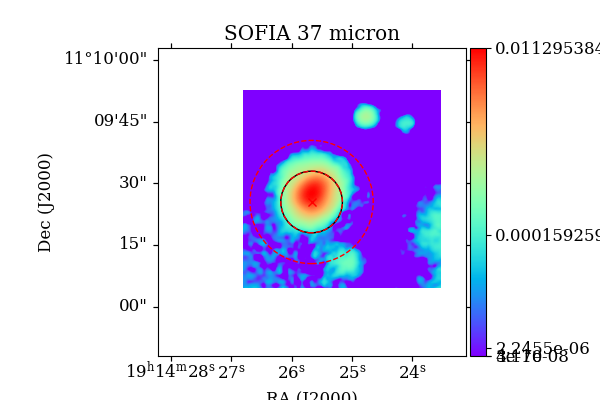

In [8]:
#SOFIA 11 micron
G4547_SO11_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_SOFIA_11.fits')

#note that for Spitzer the data is in the first extension
G4547_SO11_fluxer = SedFluxer(G4547_SO11_fits[0])

G4547_SO11_gt = G4547_SO11_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_SO11_flux_bkg,G4547_SO11_flux,G4547_SO11_flu,G4547_SO11_bkg=G4547_SO11_gt.value #Jy
G4547_SO11_syst_err = 0.1*G4547_SO11_flux_bkg
G4547_SO11_flu_error = np.sqrt(np.array(G4547_SO11_flu)**2+np.array(G4547_SO11_syst_err)**2)
G4547_SO11_bkg_error = np.sqrt(np.array(G4547_SO11_bkg)**2+np.array(G4547_SO11_syst_err)**2)
G4547_SO11_lambda = 11 #micron

#Spitzer 4.5 micron
G4547_SO25_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_SOFIA_25.fits')

#note that for Spitzer the data is in the first extension
G4547_SO25_fluxer = SedFluxer(G4547_SO25_fits[0])

G4547_SO25_gt = G4547_SO25_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_SO25_flux_bkg,G4547_SO25_flux,G4547_SO25_flu,G4547_SO25_bkg=G4547_SO25_gt.value #Jy
G4547_SO25_syst_err = 0.1*G4547_SO25_flux_bkg
G4547_SO25_flu_error = np.sqrt(np.array(G4547_SO25_flu)**2+np.array(G4547_SO25_syst_err)**2)
G4547_SO25_bkg_error = np.sqrt(np.array(G4547_SO25_bkg)**2+np.array(G4547_SO25_syst_err)**2)
G4547_SO25_lambda = 25 #micron

#Spitzer 5.8 micron
G4547_SO31_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_SOFIA_31.fits')

#note that for Spitzer the data is in the first extension
G4547_SO31_fluxer = SedFluxer(G4547_SO31_fits[0])

G4547_SO31_gt = G4547_SO31_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_SO31_flux_bkg,G4547_SO31_flux,G4547_SO31_flu,G4547_SO31_bkg=G4547_SO31_gt.value #Jy
G4547_SO31_syst_err = 0.1*G4547_SO31_flux_bkg
G4547_SO31_flu_error = np.sqrt(np.array(G4547_SO31_flu)**2+np.array(G4547_SO31_syst_err)**2)
G4547_SO31_bkg_error = np.sqrt(np.array(G4547_SO31_bkg)**2+np.array(G4547_SO31_syst_err)**2)
G4547_SO31_lambda = 31 #micron

#Spitzer 8.0 micron
G4547_SO37_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_SOFIA_37.fits')

#note that for Spitzer the data is in the first extension
G4547_SO37_fluxer = SedFluxer(G4547_SO37_fits[0])

G4547_SO37_gt = G4547_SO37_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2*G4547_opt_aper,
                                               mask=None)

G4547_SO37_flux_bkg,G4547_SO37_flux,G4547_SO37_flu,G4547_SO37_bkg=G4547_SO37_gt.value #Jy
G4547_SO37_syst_err = 0.1*G4547_SO37_flux_bkg
G4547_SO37_flu_error = np.sqrt(np.array(G4547_SO37_flu)**2+np.array(G4547_SO37_syst_err)**2)
G4547_SO37_bkg_error = np.sqrt(np.array(G4547_SO37_bkg)**2+np.array(G4547_SO37_syst_err)**2)
G4547_SO37_lambda = 37 #micron

G4547_SO37_gt.info
G4547_SO37_gt.plot(cmap='rainbow',title='SOFIA 37 micron')

### Herschel

The aperture used is 7.5 arcsec
pixel scale is 3.2 arcsec/pixel
~ 2.344 pixels are used for the aperture radius
units in the image are: Jy/pixel
Observing date:
No information found in this header
Wavelength:
No information found in this header
############################
Flux bkg sub 567.0754034233976 Jy
Flux         704.4166984373093 Jy
Fluc error   45.57066742683711 Jy
Background   137.3412950139117 Jy
############################


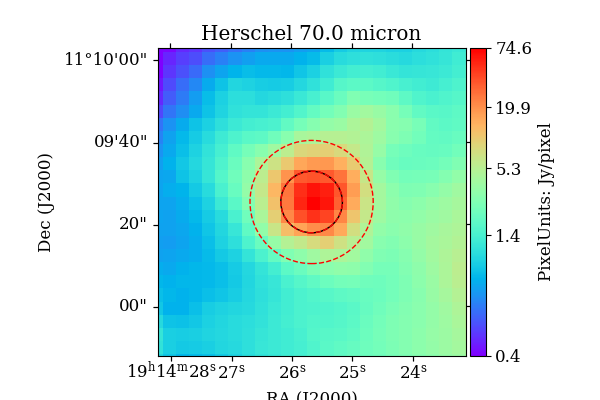

In [9]:
#Herschel 70 micron
G4547_H70_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Herschel_70.fits')

G4547_H70_fluxer = SedFluxer(G4547_H70_fits[1])

G4547_H70_gt = G4547_H70_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2.0*G4547_opt_aper,
                                               mask=None)

G4547_H70_flux_bkg,G4547_H70_flux,G4547_H70_flu,G4547_H70_bkg=G4547_H70_gt.value #Jy
G4547_H70_syst_err = 0.1*G4547_H70_flux_bkg
G4547_H70_flu_error = np.sqrt(np.array(G4547_H70_flu)**2+np.array(G4547_H70_syst_err)**2)
G4547_H70_bkg_error = np.sqrt(np.array(G4547_H70_bkg)**2+np.array(G4547_H70_syst_err)**2)
G4547_H70_lambda = 70.0 #micron

#Herschel 160 micron
G4547_H160_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Herschel_160.fits')

G4547_H160_fluxer = SedFluxer(G4547_H160_fits[1])

G4547_H160_gt = G4547_H160_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2.0*G4547_opt_aper,
                                               mask=None)

G4547_H160_flux_bkg,G4547_H160_flux,G4547_H160_flu,G4547_H160_bkg=G4547_H160_gt.value #Jy
G4547_H160_syst_err = 0.1*G4547_H160_flux_bkg
G4547_H160_flu_error = np.sqrt(np.array(G4547_H160_bkg)**2+np.array(G4547_H160_syst_err)**2)
G4547_H160_bkg_error = np.sqrt(np.array(G4547_H160_bkg)**2+np.array(G4547_H160_syst_err)**2)
G4547_H160_lambda = 160.0 #micron

#Herschel 250 micron
G4547_H250_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Herschel_250.fits')

G4547_H250_fluxer = SedFluxer(G4547_H250_fits[1])

G4547_H250_gt = G4547_H250_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2.0*G4547_opt_aper,
                                               mask=None)

G4547_H250_flux_bkg,G4547_H250_flux,G4547_H250_flu,G4547_H250_bkg=G4547_H250_gt.value #Jy
G4547_H250_syst_err = 0.1*G4547_H250_flux_bkg
G4547_H250_flu_error = np.sqrt(np.array(G4547_H250_bkg)**2+np.array(G4547_H250_syst_err)**2)
G4547_H250_bkg_error = np.sqrt(np.array(G4547_H250_bkg)**2+np.array(G4547_H250_syst_err)**2)
G4547_H250_lambda = 250.0 #micron

#Herschel 350 micron
G4547_H350_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Herschel_350.fits')

G4547_H350_fluxer = SedFluxer(G4547_H350_fits[1])

G4547_H350_gt = G4547_H350_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2.0*G4547_opt_aper,
                                               mask=None)

G4547_H350_flux_bkg,G4547_H350_flux,G4547_H350_flu,G4547_H350_bkg=G4547_H350_gt.value #Jy
G4547_H350_syst_err = 0.1*G4547_H350_flux_bkg
G4547_H350_flu_error = np.sqrt(np.array(G4547_H350_bkg)**2+np.array(G4547_H350_syst_err)**2)
G4547_H350_bkg_error = np.sqrt(np.array(G4547_H350_bkg)**2+np.array(G4547_H350_syst_err)**2)
G4547_H350_lambda = 350.0 #micron

#Herschel 500 micron
G4547_H500_fits = pyfits.open('C:\\Users\\pablo\\Desktop\\TFM\\SED\\SED_G45\\G45.47_Herschel_500.fits')

G4547_H500_fluxer = SedFluxer(G4547_H500_fits[1])

G4547_H500_gt = G4547_H500_fluxer.get_flux(central_coords=G4547_coords,
                                               aper_rad=G4547_opt_aper,
                                               inner_annu=1.0*G4547_opt_aper,
                                               outer_annu=2.0*G4547_opt_aper,
                                               mask=None)

G4547_H500_flux_bkg,G4547_H500_flux,G4547_H500_flu,G4547_H500_bkg=G4547_H500_gt.value #Jy
G4547_H500_syst_err = 0.1*G4547_H500_flux_bkg
G4547_H500_flu_error = np.sqrt(np.array(G4547_H500_bkg)**2+np.array(G4547_H500_syst_err)**2)
G4547_H500_bkg_error = np.sqrt(np.array(G4547_H500_bkg)**2+np.array(G4547_H500_syst_err)**2)
G4547_H500_lambda = 500.0 #micron

G4547_H70_gt.info
G4547_H70_gt.plot(cmap='rainbow',title='Herschel 70.0 micron')

# Plotting

In [27]:
# We don't take into account the emission at 11 um bc it is dominated by the background
G4547_ALL_flux_bkg = np.array([G4547_S36_flux_bkg,G4547_S45_flux_bkg,G4547_S58_flux_bkg,G4547_S80_flux_bkg, G4547_SO11_flux_bkg,
                               G4547_SO25_flux_bkg,G4547_SO31_flux_bkg,G4547_SO37_flux_bkg,
                                  G4547_H70_flux_bkg,G4547_H160_flux_bkg,G4547_H250_flux_bkg,G4547_H350_flux_bkg,G4547_H500_flux_bkg])

G4547_ALL_flu_error = np.array([G4547_S36_flu_error,G4547_S45_flu_error,G4547_S58_flu_error,G4547_S80_flu_error, G4547_SO11_flu_error,
                               G4547_SO25_flu_error,G4547_SO31_flu_error,G4547_SO37_flu_error,
                               G4547_H70_flu_error,G4547_H160_flu_error,G4547_H250_flu_error,G4547_H350_flu_error,G4547_H500_flu_error])


G4547_ALL_flux = np.array([G4547_S36_flux,G4547_S45_flux,G4547_S58_flux,G4547_S80_flux, G4547_SO11_flux,
                               G4547_SO25_flux,G4547_SO31_flux,G4547_SO37_flux,
                                  G4547_H70_flux,G4547_H160_flux,G4547_H250_flux,G4547_H350_flux,G4547_H500_flux])

In [11]:
print(G4547_ALL_flux_bkg)

[ 5.03888140e-02  1.39559447e-01  1.20417858e-01  1.21677901e-01
 -8.87248519e-02  4.51070717e+01  1.32721938e+02  1.84226213e+02
  5.67075403e+02  3.04383251e+02  4.26894266e+01  1.21378835e+01
  5.36794021e-02]


In [28]:
G4547_ALL_flux

array([ 6.77492655e-02,  1.66347663e-01,  2.36749497e-01,  4.02870814e-01,
       -2.59971513e-02,  4.18682125e+01,  1.32729050e+02,  1.84605730e+02,
        7.04416698e+02,  4.92670984e+02,  1.30502234e+02,  3.91625831e+01,
        8.29868509e+00])

In [29]:
G4547_ALL_flu_error

array([5.76721332e-03, 1.62329644e-02, 2.63955693e-02, 6.33810627e-02,
       7.80993064e-02, 4.60289130e+00, 1.32863440e+01, 1.88934717e+01,
       7.27490953e+01, 1.90732174e+02, 8.79165121e+01, 2.70519439e+01,
       8.24500743e+00])

# Fitting

In [12]:
# We don't take into account the emission at 11 um bc it is dominated by the background
G4547_ALL_flux_bkg = np.array([G4547_S36_flux_bkg,G4547_S45_flux_bkg,G4547_S58_flux_bkg,G4547_S80_flux_bkg,
                               G4547_SO25_flux_bkg,G4547_SO31_flux_bkg,G4547_SO37_flux_bkg,
                                  G4547_H70_flux_bkg,G4547_H160_flux_bkg,G4547_H250_flux_bkg,G4547_H350_flux_bkg,G4547_H500_flux_bkg])

G4547_ALL_flu_error = np.array([G4547_S36_flu_error,G4547_S45_flu_error,G4547_S58_flu_error,G4547_S80_flu_error,
                               G4547_SO25_flu_error,G4547_SO31_flu_error,G4547_SO37_flu_error,
                               G4547_H70_flu_error,G4547_H160_flu_error,G4547_H250_flu_error,G4547_H350_flu_error,G4547_H500_flu_error])

G4547_ALL_lambda = np.array([G4547_S36_lambda,G4547_S45_lambda,G4547_S58_lambda,G4547_S80_lambda,
                                G4547_SO25_lambda, G4547_SO31_lambda,G4547_SO37_lambda,
                                G4547_H70_lambda,G4547_H160_lambda,G4547_H250_lambda,G4547_H350_lambda,G4547_H500_lambda])

G4547_ALL_flux = np.array([G4547_S36_flux,G4547_S45_flux,G4547_S58_flux,G4547_S80_flux, 
                               G4547_SO25_flux,G4547_SO31_flux,G4547_SO37_flux,
                                  G4547_H70_flux,G4547_H160_flux,G4547_H250_flux,G4547_H350_flux,G4547_H500_flux])

In [13]:
G4547_ALL_flux_bkg

array([5.03888140e-02, 1.39559447e-01, 1.20417858e-01, 1.21677901e-01,
       4.51070717e+01, 1.32721938e+02, 1.84226213e+02, 5.67075403e+02,
       3.04383251e+02, 4.26894266e+01, 1.21378835e+01, 5.36794021e-02])

In [25]:
G4547_ALL_flu_error

array([5.76721332e-03, 1.62329644e-02, 2.63955693e-02, 6.33810627e-02,
       4.60289130e+00, 1.32863440e+01, 1.88934717e+01, 7.27490953e+01,
       1.90732174e+02, 8.79165121e+01, 2.70519439e+01, 8.24500743e+00])

In [26]:
G4547_ALL_flux

array([6.77492655e-02, 1.66347663e-01, 2.36749497e-01, 4.02870814e-01,
       4.18682125e+01, 1.32729050e+02, 1.84605730e+02, 7.04416698e+02,
       4.92670984e+02, 1.30502234e+02, 3.91625831e+01, 8.29868509e+00])

In [14]:
G4547_ALL_upp_lim = np.array([1,1,1,1,#Spitzer fluxes are upper limits
                                 0,0,0,
                                 0,0,0,0,0],
                                dtype=bool)

G4547_ALL_filters = np.array(['I1','I2','I3','I4',#Spitzer filter names
                                 'F9','L1','L4',#SOFIA filter names
                                 'P1','P3','P4','P5','P6'])#Herschel filter names

In [15]:
#  we can initiate the SedFitter class also defining an extinction law (by default is kmh that refers the Kim, Martin Hendry 1994) to as follows
G4547_fitter = SedFitter(extc_law='kmh',
                            lambda_array=G4547_ALL_lambda,
                            flux_array=G4547_ALL_flux_bkg,
                            err_flux_array=G4547_ALL_flu_error,
                            upper_limit_array=G4547_ALL_upp_lim,
                            filter_array=G4547_ALL_filters)

In [16]:
G4547_dist = 8400.0 #pc
AV_min = 0 #mag
AV_max = 1000 #mag

#4)

G4547_sed_fit = G4547_fitter.sed_fit(dist=G4547_dist,AV_min=AV_min,AV_max=AV_max,
                                           method='minimize',progress=True)

100%|██████████████████████████████████████████████████████████████████████████████| 8640/8640 [07:50<00:00, 18.38it/s]


In [17]:
G4547_results_3p = G4547_sed_fit.get_model_info(keys=['mcore','sigma','mstar'],
                                                      tablename=None)

G4547_results_4p = G4547_sed_fit.get_model_info(keys=['mcore','sigma','mstar','theta_view'],
                                                      tablename=None) 

In [24]:
G4547_results_4p[G4547_results_4p['rcore']<0.03]

SED_number,chisq,chisq_nonlim,mcore,sigma,mstar,theta_view,dist,av,rcore,massenv,theta_w_esc,rstar,lstar,tstar,mdisk,rdisk,mdotd,lbol,lbol_iso,lbol_av,t_now
,,,solMass,g / cm2,solMass,deg,pc,mag,pc,solMass,deg,solRad,solLum,K,solMass,AU,solMass / yr,solLum,solLum,solLum,yr
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
05_04_07_08,10.20536,10.20536,50.0,3.16,16.0,51.31781,8400.0,24.37440,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,3.13857e+04,2.49620e+04,3.61839e+04
05_04_07_07,10.39257,10.39257,50.0,3.16,16.0,47.54585,8400.0,41.79753,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,3.67224e+04,2.49103e+04,3.61839e+04
05_04_07_09,10.86580,10.86580,50.0,3.16,16.0,54.90037,8400.0,15.03223,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,2.80557e+04,2.42445e+04,3.61839e+04
05_04_07_10,11.62577,11.62577,50.0,3.16,16.0,58.33176,8400.0,9.04410,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,2.57775e+04,2.34386e+04,3.61839e+04
05_04_07_11,12.37705,12.37705,50.0,3.16,16.0,61.64065,8400.0,4.86998,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,2.41081e+04,2.26853e+04,3.61839e+04
05_04_06_05,12.64850,12.64850,50.0,3.16,12.0,39.19497,8400.0,4.24245,0.0292712,27.72436,30.1628,47.3527,46538.9,12326.3,4.0,45.8589,7.10272e-04,5.08608e+04,2.23695e+04,2.10278e+04,3.09682e+04
05_04_07_06,13.06369,13.06369,50.0,3.16,16.0,43.53115,8400.0,80.30446,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,4.69754e+04,2.23218e+04,3.61839e+04
05_04_07_12,13.11285,13.11285,50.0,3.16,16.0,64.84934,8400.0,1.89552,0.0292712,20.51685,36.5657,23.4334,98872.6,21154.5,5.333333,57.7855,7.70947e-04,1.11640e+05,2.28292e+04,2.20243e+04,3.61839e+04


In [30]:
SedFitter().get_average_model(G4547_results_4p[G4547_results_4p['rcore']<0.611],chisq_cut=2)   # No mult por 2 porque es menor a 1

method,number_of_models_used,mcore,Dmcore,sigma,Dsigma,mstar,Dmstar,theta_view,Dtheta_view,dist,av,Dav,rcore,Drcore,massenv,Dmassenv,theta_w_esc,Dtheta_w_esc,rstar,Drstar,lstar,Dlstar,tstar,Dtstar,mdisk,Dmdisk,rdisk,Drdisk,mdotd,Dmdotd,lbol,Dlbol,lbol_iso,Dlbol_iso,lbol_av,Dlbol_av,t_now,Dt_now
str22,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
average model method 1,5,127.10686,1.13730,3.16000,1.00000,16.00000,1.00000,38.72770,6.56027,8400.0,22.60768,17.33907,0.04667,1.06644,96.77888,1.18819,2.00681e+01,1.37404,40.21860,1.04422,1.05627e+05,1.00363,1.64165e+04,1.02094,5.33333,1.00000,4.49547e+01,1.04838,1.11309e-03,1.03501,1.15579e+05,1.00122,7.76989e+04,1.15545,6.82858e+04,1.06054,2.78460e+04,1.04071
average model method 2,247,252.35012,1.62573,0.86095,2.74954,28.84771,1.43319,60.75610,17.04985,8400.0,37.04350,35.25757,0.12598,2.08181,178.67473,1.80416,2.71938e+01,7.47272,10.39536,1.73386,1.69518e+05,1.85180,3.63443e+04,1.35169,9.61591,1.43319,1.16693e+02,1.74054,6.33249e-04,1.84902,2.21537e+05,1.82687,8.89072e+04,1.30606,7.23800e+04,1.13740,8.41590e+04,2.04465


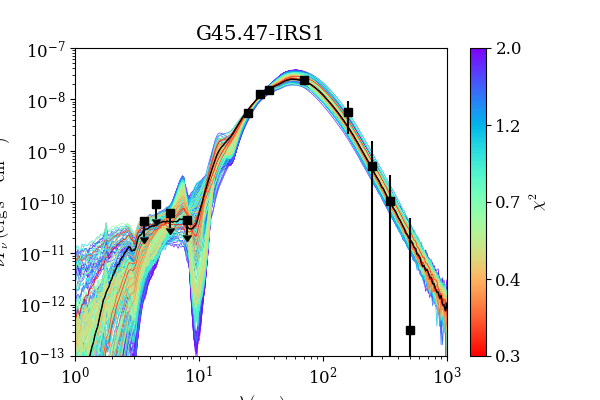

In [31]:
G4547_md = ModelPlotter(G4547_sed_fit)

G4547_md.plot_multiple_seds(models=G4547_results_4p[G4547_results_4p['chisq']<2],
                               figsize=(6,4),
                               xlim=[1e0,1e3],ylim=[1e-13,1e-7],
                               title='G45.47-IRS1',
                               marker='ks',cmap='rainbow_r',colorbar=True,
                               figname=None)
#plt.savefig('C:\\Users\\pablo\\Desktop\\TFM\\images_TFM\\SED_main.png',dpi=300,bbox_inches='tight')

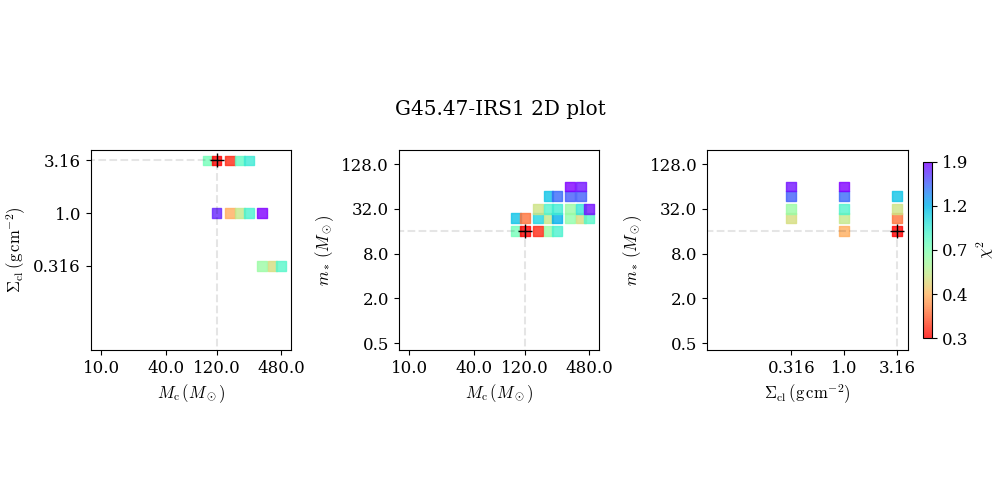

In [32]:
G4547_md.plot2d(models=G4547_results_4p[G4547_results_4p['chisq']<2],
                   figsize=(10, 5),
                   marker='s',
                   markersize=50,
                   cmap='rainbow_r',
                   title='G45.47-IRS1 2D plot',
                   figname=None)
#plt.savefig('C:\\Users\\pablo\\Desktop\\TFM\\images_TFM\\parameters_main.png',dpi=300,bbox_inches='tight')